# MALIGNANT COMMENTS CLASSIFICATION

## INTRODUCTION

##### The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users.There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms.Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms.Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying 

In [2]:
from IPython.display import Image
Image(url= "https://aldianews.com/sites/default/files/articles/comments_web.jpg")

## Libraries

In [61]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [63]:
# i have import all the necessaries libraries in one go.

# EDA - Exploratory Data Analysis

## Dataset

In [64]:
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [65]:
# The dataset gives me the clear idea that there are 6 target variables and only 1 feature.

## Correlation

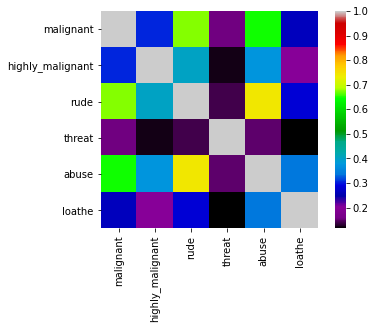

In [66]:
sns.heatmap(df.corr(), square=True, cmap='nipy_spectral')
plt.show()

In [67]:
# None of the features and label are corelated with each other.

In [68]:
df.shape

(159571, 8)

In [69]:
# There are 159571 rows and 8 columns in the dataset

In [70]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [71]:
# There are 6 columns integers type and 2 columns object type.

In [72]:
df.drop_duplicates(inplace = True)

In [73]:
df.shape

(159571, 8)

In [74]:
# There are no duplicates in the dataset.

In [75]:
df.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [76]:
# There are 2 columns which are continous type and 6 target variables are categorical type.

In [77]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
# Counts in all the rows is equal.
# All the minimum value is 0.
# There is nothing much to analysis from the descibe code.

In [79]:
df.drop('id',inplace=True,axis=1)

In [80]:
# Dropping the id columns as it is of no use.

# Count Plot

## malignant

In [81]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

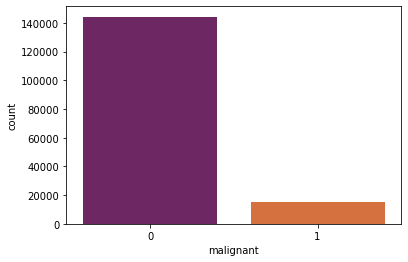

In [82]:
sns.countplot(df['malignant'],palette = 'inferno',data=df);

In [83]:
# Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
# 144277 represent not malignant comment and only 15294 are malignant.

## highly_malignant

In [84]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

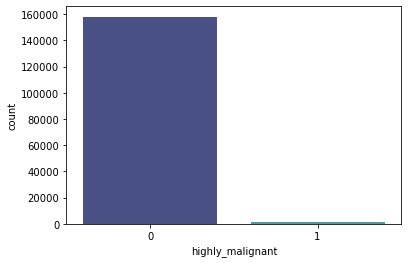

In [85]:
sns.countplot(df['highly_malignant'],palette = 'mako',data=df);

In [86]:
# highly_malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is highly_malignant or not.
# 157976 represent not highly_malignant comment and only 1595 are malignant.

## rude

In [87]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

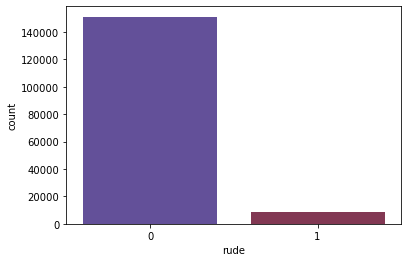

In [88]:
sns.countplot(df['rude'],palette = 'twilight',data=df);

In [89]:
#Rude: It denotes comments that are very rude and offensive.
# 151122 represent not rude comment and only 8449 are rude.

## threat

In [90]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

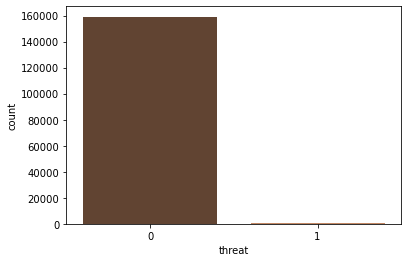

In [91]:
sns.countplot(df['threat'],palette = 'copper',data=df);

In [92]:
# Threat: It contains indication of the comments that are giving any threat to someone.
# 159093 represent not threat comment and only 478 comments are threat type.

## abuse

In [93]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

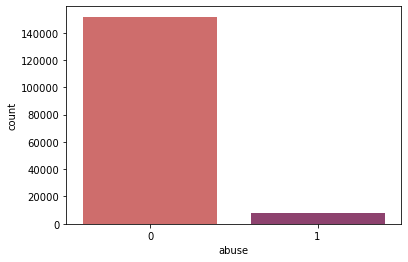

In [94]:
sns.countplot(df['abuse'],palette = 'flare',data=df);

In [95]:
# Abuse: It is for comments that are abusive in nature.
# # 159093 represent not threat comment and only 478 comments are threat type.

## loathe

In [96]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

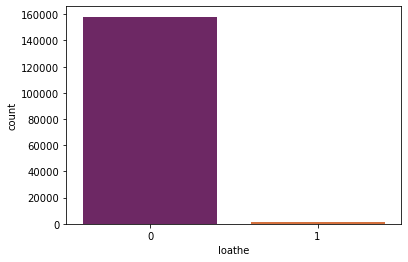

In [97]:
sns.countplot(df['loathe'],palette = 'inferno',data=df);

In [98]:
# Loathe: It describes the comments which are hateful and loathing in nature.  
# 158166 represent not loathe comments and only 1405 comments are loathe type.

In [99]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [100]:
# Comment text columns contains the information of all the comments in the features variable.

In [101]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [102]:
# I have import nltk that is Natural Language Toolkit which help me to inbuilt all the libraries in one go.

In [103]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [104]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'no', 'with', 'doing', 'hers', 'these', "hadn't", 'once', 'if', "didn't", 'won', "it's", 'what', 'all', 'will', 'an', 'above', 'how', "aren't", 'me', 'itself', 'very', 'now', "wasn't", 'off', 'who', 'whom', 'not', 'theirs', 'ma', 'had', 'than', 'more', 'on', 'm', 'her', "that'll", 'there', "she's", 'have', "couldn't", 'him', 'has', 'between', 'y', 'having', 'shouldn', 'which', 'any', 'd', 'through', 'down', 'below', 'again', 'does', 'didn', 'it', 'too', 'did', 'to', 'from', 'hasn', "you'll", "you're", 'just', 'that', 'mustn', 'is', 'yours', 'few', 'aren', 'same', 'then', "shouldn't", 'until', 'the', 'under', 'are', 'isn', 'themselves', 'them', 'a', 'here', 'only', 'myself', 'this', 'for', 'yourselves', 'those', 'each', 'needn', 'shan', 'nor', 'over', 'so', 'couldn', 'where', 'during', 'why', 's', 'most', 'was', 'when', 'doesn', 'our', 'its', 'other', 'ain', 'out', "mightn't", 'and', "don't", "won't", 'as', 'my', 'before', 'been', 'or', "weren't", 'further', 'up', 'but', 'both', 'while

In [105]:
# I have import stopwards that help me to identify all the common words which i can remove it fom comments columns.

In [106]:
from nltk.stem import WordNetLemmatizer

In [107]:
#Lemmatization is the process of converting a word to its base form. 
#The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [108]:
from nltk.stem.porter import PorterStemmer

In [109]:
# Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems.

In [110]:
import re

In [111]:
# Regular expressions are typically used in applications that involve a lot of text processing. 
#For example, they are commonly used as search patterns in text editing programs used by developers, including vi, emacs, and modern IDEs.

In [112]:
comment_text = ["comment_text"]

In [113]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(df['comment_text'][0])
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [114]:
# I have used the PorterStemmer and WordNetLemmatizer in comment text columns so that i can minimize the numbers of words from the columns and get some meaningful information out of it.
# It will also help us to improve the accuracy score. 

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 159571)
X = cv.fit_transform(corpus).toarray()

In [116]:
# I have Created the Bag of Words model for model prediction. This will convert the words into numbers.

In [117]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [118]:
# Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

# Machine Learning

In [119]:
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [120]:
# I have put all the labels in dictionary for model buildings.

# Model Building

In [121]:
train, test = train_test_split(df, test_size=0.33, random_state=42, shuffle=True)

In [122]:
# I have used 33% for testing and 67% for training purpose.

In [123]:
train.shape, test.shape

((106912, 7), (52659, 7))

In [124]:
# There are 106912 rows and 7 columns will be used for training purpose and remaining 52659 rows and 7 columns will be used for testing purpose.

In [125]:
X_train = train['comment_text']
X_test = test['comment_text']

In [126]:
accuracies = [[],[],[]]

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer()
tvec = TfidfTransformer()
model1 = MultinomialNB()

In [128]:
X_train = tvec.fit_transform(cvec.fit_transform(X_train))
X_test = tvec.transform(cvec.transform(X_test))

## Multinomial Naive Bayes

In [129]:
for category in labels:
    model1.fit(X_train, train[category])
    accuracy = model1.score(X_test, test[category])
    accuracies[0].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 91.67%
Accuracy For highly_malignant Class Is 99.0%
Accuracy For rude Class Is 95.02%
Accuracy For threat Class Is 99.71%
Accuracy For abuse Class Is 95.13%
Accuracy For loathe Class Is 99.1%


## Linear Support Vector Classifier

In [130]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
for category in labels:
    model2.fit(X_train, train[category])
    accuracy = model2.score(X_test, test[category])
    accuracies[1].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 96.15%
Accuracy For highly_malignant Class Is 99.07%
Accuracy For rude Class Is 97.9%
Accuracy For threat Class Is 99.75%
Accuracy For abuse Class Is 97.19%
Accuracy For loathe Class Is 99.21%


## Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(n_jobs=1, solver='liblinear')
for category in labels:
    model3.fit(X_train, train[category])
    accuracy = model3.score(X_test, test[category])
    accuracies[2].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 95.62%
Accuracy For highly_malignant Class Is 99.1%
Accuracy For rude Class Is 97.57%
Accuracy For threat Class Is 99.73%
Accuracy For abuse Class Is 96.98%
Accuracy For loathe Class Is 99.17%


## Bar Plot for 3 model predition.

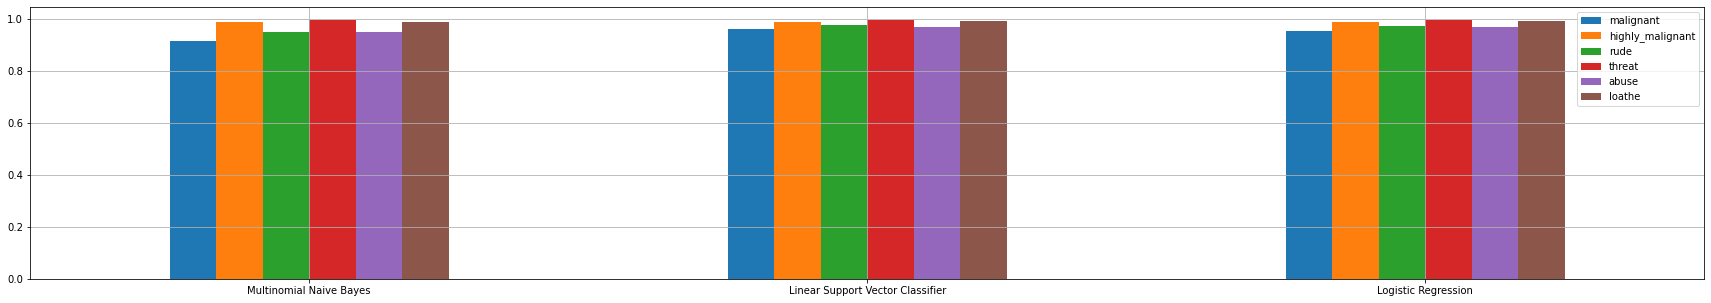

In [132]:
accuracies = pd.DataFrame(accuracies)
fig = accuracies.plot.bar(figsize=(30, 5), grid=True)
plt.xticks(np.arange(3),('Multinomial Naive Bayes','Linear Support Vector Classifier','Logistic Regression'),rotation=0)
plt.legend(labels)
plt.show()

In [133]:
# I can say that all the 3 models prediction is almost same with minor accuracy difference.

In [134]:
for i in range(3):
    print("Model -",i+1,"... Aggregate Accuracy -",np.mean(accuracies.iloc[i,:]))

Model - 1 ... Aggregate Accuracy - 0.9660773403723327
Model - 2 ... Aggregate Accuracy - 0.9821049899668939
Model - 3 ... Aggregate Accuracy - 0.9802945998468132


In [135]:
# I have used 3 model for model prediction and after doing the aggregate the best model accuracy is 98.21% that is Linear Support Vector Classifier.

## Saving the Best Model

In [136]:
import pickle

In [139]:
filename = 'finalized_model.pickle'
pickle.dump(model2,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

## Conclusion

In [140]:
# I have managed out how to prepare a model that gives users for a novel best approach at future lodging value predictions.
# I have train dataset from which I had to extract information.
# I had used pandas library to read the Dataset which provide me to explore & visualize the Data properly based on Rows & Columns.
# I did exploratory data analysis on main data frame and tried to see all visualizations.
# Based on visualization knowledge, I use various EDA TECHNIQUES to plot the count plot.
# After from all these I split the Features & Labels into 2 parts.
# On this data, I have applied our machine learning classification models such as Logistic regression, Linear Support Vector Classifier and Multinomial Naive Bayes train dataset.
# After which I found Linear Support Vector Classifier has the High accuracy score(98.21%) and best among all the regressor models.
